<a href="https://colab.research.google.com/github/shreya116/google_colab/blob/main/cifar10_68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR-10 IMAGE CLASSIFICATION**


### Here, Image Classification is done by Convolutional Neural Networks using the CIFAR-10 dataset. 

### The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.


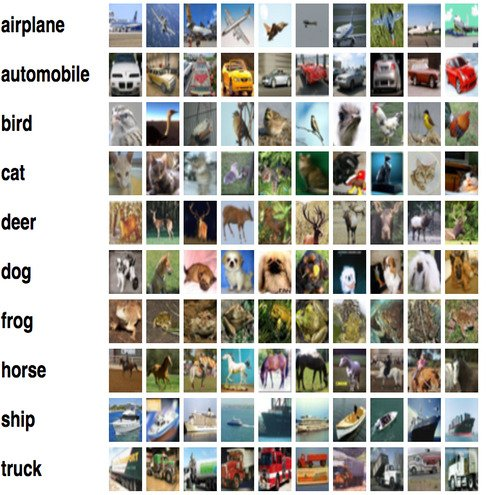


# **Convolutional Neural Networks**


### A Convolutional Neural Network, also known as CNN or ConvNet, have been loosely inspired by our brain’s visual system in order to do that. Visual information that enters our brain through our eyes, travels through neurons in brain regions and is consumed in stages of increasing complexity, starting from simple visual representations such as edges, lines, curves etc. and continues with more complex representations such as, for instance, faces or full bodies.

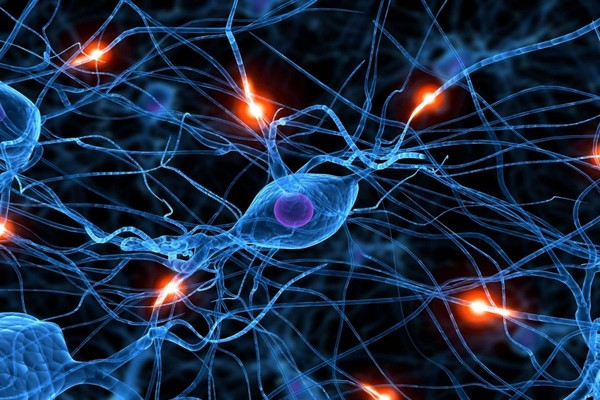



### CNN is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image. A digital image is a binary representation of visual data. It contains a series of pixels arranged in a grid-like fashion that contains pixel values to denote how bright and what color each pixel should be.

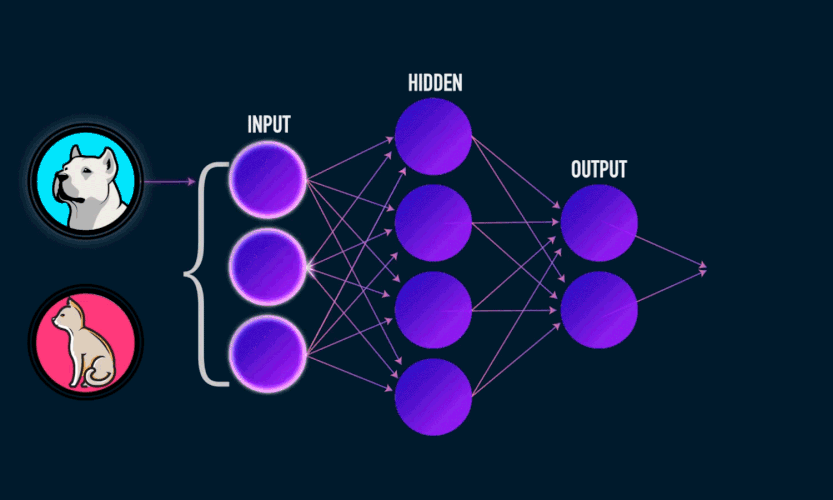

# **Convolutional Neural Network Architecture**


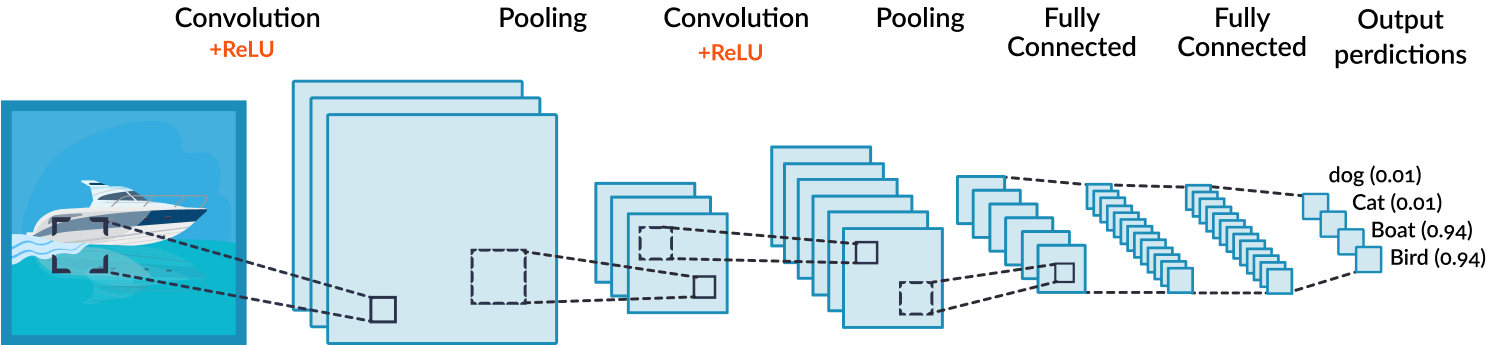

## **Input Layer**
### Input layer in CNN should contain image data. Every image is a matrix of pixel values. With colored images, particularly RGB (Red, Green, Blue)-based images, the presence of separate color channels (3 in the case of RGB images) introduces an additional ‘depth’ field to the data, making the input 3-dimensional. 

### For Example: If we have a colored (RGB) image with width and height of 255 then we’ll have 3 matrices associated with each image, one for each of the color channels. Thus, the image in it’s entirety, constitutes a 3-dimensional structure called the Input Volume (255x255x3).

## **Convolution + ReLU Layer**
### Convolution layer is also known as the feature extraction layer because features of the image get extracted within this layer. In this layer, we look at the image through smaller sections and move the filter over the image, this way we can find features in a particular section.
### The weights of the filter are convolved with the input to produce a single integer value to the output. the output of this layer will be the input to the next layer. 

### Convolution layer also contains the ReLU activation which uses activation functions to make all negative values to zero.

## Hyperparameters
### There are three hyperparameters control the size of the output volume: the depth, stride and zero-padding.
### - Depth (D) of the output volume is a hyperparameter: it corresponds to the number of filters we would like to use, each learning to look for something different in the input. 
### - Stride (S) with which we slide the filter. When the stride is 1 then we move the filters one pixel at a time. 
### - Padding refers to the process of adding pixels to the input matrix. It’s a commonly used modification that allows the size of the input to be adjusted to our requirement. It is mostly used in designing the CNN layers when the dimensions of the input volume need to be preserved in the output volume.

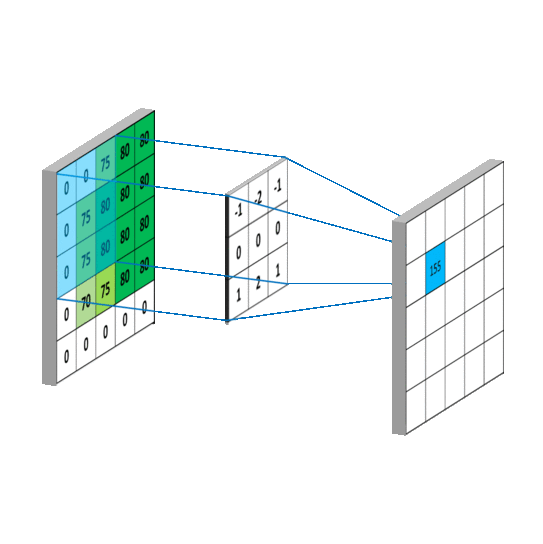

## **Max Pooling**

### Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map. It also reduces the computational cost by reducing the number of parameters to learn

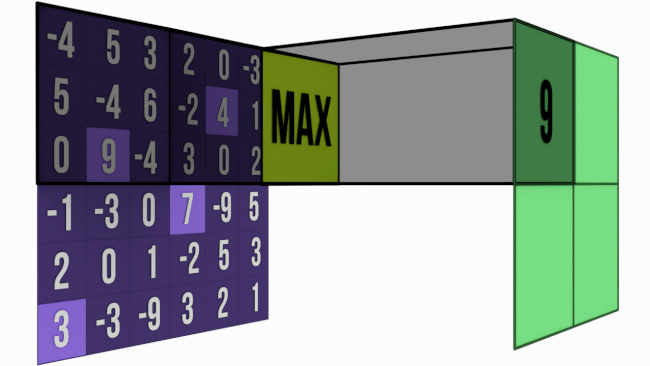

## **Fully Connected Layer(FC)**
### At the end of convolution and pooling layers, networks generally use fully-connected layers in which each pixel is considered as a separate neuron just like a regular neural network. The last fully-connected layer will contain as many neurons as the number of classes to be predicted. For instance, in CIFAR-10 case, the last fully-connected layer will have 10 neurons.

# **IMPLEMENTATION**

### We need the following libraries and dependencies to start coding. Numpy deals with arrays, pandas with data-frames and torch with tensors.

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### We can download the dataset train and test datasets as follows:

### As we will be working with tensors in PyTorch, we have transformed the dataset into tensors using transform=ToTensor() parameter.

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### The size of training and test datasets can be checked as shown below:


In [7]:
train_size = len(trainset)
train_size

50000

In [8]:
test_size = len(testset)
test_size

10000

### We can enlist the 10 classes in the dataset as:

In [9]:
classes = trainset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

###The next step in exploring the dataset would be :


###1. Check the size of the tensors formed from the images.
### 2. Display the images, and see for yourself how difficult it is even for a human to recognize the object in the image with the resolution of 32X32X3.

### The PyTorch tensor's dimension 3 below denotes the color channels of the images.


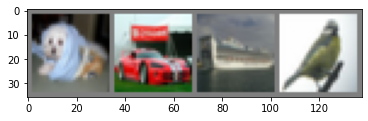

  dog automobile  ship  bird
torch.Size([4, 3, 32, 32])


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
print(images.shape)

### Now, we will create a generic basic model for solving our classification problem. This model can be extended to solve any classification problem not just CIFAR-10. We will be building on top of the nn. Module class already provided by PyTorch, it contains the initialization and forward methods.

### We have used a 3 layer model to build a network. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time. This means that the neurons will only be deactivated if the output of the linear transformation is less than 0.

In [ ]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 300, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(300, 750, 5)
        self.fc1 = nn.Linear(750 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 750 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function.

### Here we are calculating Cross Entropy Loss and trying to reduce it by using SGD Optimizer

In [ ]:


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Training the network and hyper-parameter tuning


In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.957
[1,  4000] loss: 1.580
[1,  6000] loss: 1.441
[1,  8000] loss: 1.327
[1, 10000] loss: 1.255
[1, 12000] loss: 1.185
[2,  2000] loss: 1.060
[2,  4000] loss: 1.017
[2,  6000] loss: 0.991
[2,  8000] loss: 0.947
[2, 10000] loss: 0.927
[2, 12000] loss: 0.898
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

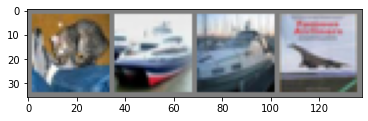

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird truck   dog   car


## Testing the model
### This is the last step. We check the accuracy of our model on test images.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 68 %


### We've got an accuracy of 68% which means our model predicts the object more than 68% of the time correctly. This can be further improved by using a different architecture of more hyper-parameter tuning.

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 79 %
Accuracy of   car : 90 %
Accuracy of  bird : 47 %
Accuracy of   cat : 48 %
Accuracy of  deer : 81 %
Accuracy of   dog : 60 %
Accuracy of  frog : 63 %
Accuracy of horse : 74 %
Accuracy of  ship : 72 %
Accuracy of truck : 65 %
